In [1]:
import numpy as np
import time, os, sys, glob
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io, models

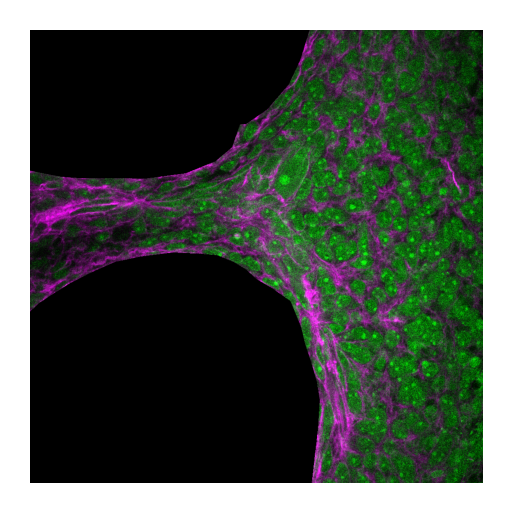

In [2]:
# get file list

files = glob.glob('../data/SMG-mesenchyme-images/*.tif')

# view 1 image
img = io.imread(files[-1])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
# RUN CELLPOSE

# DEFINE CELLPOSE MODEL
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
channels = [1,2] # R=cytoplasm and G=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

# run all images in a list
imgs = [io.imread(filename) for filename in files]
masks, flows, styles, diams = model.eval(imgs, diameter=40, channels=channels)
io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
io.save_to_png(imgs, masks, flows, files)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 13 image(s)


100%|██████████| 13/13 [15:22<00:00, 70.99s/it]


time spent: running network 877.15s; flow+mask computation 45.65
estimated masks for 13 image(s) in 923.65 sec
>>>> TOTAL TIME 923.65 sec
